<a href="https://colab.research.google.com/github/Christinastalin/DataScience-/blob/main/Face_Mask_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("andrewmvd/face-mask-detection")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/face-mask-detection


In [2]:
import os

In [3]:
from keras.preprocessing import image

In [4]:
path

'/kaggle/input/face-mask-detection'

In [5]:
import shutil
import os
import pandas as pd
import xml.etree.ElementTree as ET
import cv2 # Import cv2

output_dir = "/content/data_split"
os.makedirs(output_dir, exist_ok=True)

# Create a list to store image data
image_data = []

# Assuming 'path' points to the root of the dataset including 'images' and 'annotations' folders
annotations_dir = os.path.join(path, "annotations")
images_dir = os.path.join(path, "images") # Define images directory

# Iterate through all XML files in the annotations directory
for xml_filename in os.listdir(annotations_dir):
    if xml_filename.endswith(".xml"):
        xml_file_path = os.path.join(annotations_dir, xml_filename)
        tree = ET.parse(xml_file_path)
        root = tree.getroot()

        # Extract image filename
        image_filename = root.find("filename").text

        # Construct the full path to the image
        img_path = os.path.join(images_dir, image_filename)

        # Read the image using OpenCV
        img_array = cv2.imread(img_path)

        # Check if the image was read successfully
        if img_array is not None:
            # Iterate through all objects in the XML to get labels
            for obj in root.findall("object"):
                label = obj.find("name").text
                # Append the image array, filename, and label to the list
                image_data.append({'image': img_array, 'filename': image_filename, 'class': label})
        else:
            print(f"Warning: Could not read image file at {img_path}")

# Create the DataFrame
df = pd.DataFrame(image_data)

# The rest of your code for creating directories and copying files can remain the same
for label in df['class'].unique():
    os.makedirs(os.path.join(output_dir, label), exist_ok=True)

for index, row in df.iterrows():
    label = row['class']
    # The img_path is already constructed above, but we can get it from the DataFrame if needed
    # img_path = os.path.join(images_dir, row['filename']) # You can get it from df if you prefer
    # Ensure the image file exists before attempting to copy
    original_img_path = os.path.join(images_dir, row['filename'])
    if os.path.exists(original_img_path):
        shutil.copy(original_img_path, os.path.join(output_dir, label))
    else:
        print(f"Warning: Image file not found at {original_img_path}")

In [7]:
image_data[0]

{'image': array([[[150, 210,  96],
         [147, 205,  94],
         [148, 203,  94],
         ...,
         [ 95,  97,  97],
         [ 93,  95,  96],
         [ 84,  86,  86]],
 
        [[148, 207,  95],
         [148, 206,  95],
         [150, 207,  95],
         ...,
         [ 96,  98,  98],
         [ 94,  96,  97],
         [ 84,  86,  87]],
 
        [[147, 206,  94],
         [147, 205,  94],
         [150, 208,  96],
         ...,
         [ 96,  96,  97],
         [ 93,  93,  94],
         [ 83,  83,  84]],
 
        ...,
 
        [[ 99, 101,  87],
         [ 58,  58,  50],
         [109, 107, 102],
         ...,
         [ 61,  72,  76],
         [ 88,  99, 101],
         [ 86,  95,  95]],
 
        [[104, 103,  92],
         [ 56,  53,  45],
         [102,  97,  91],
         ...,
         [ 80,  83,  89],
         [113, 114, 119],
         [135, 135, 138]],
 
        [[113, 111, 100],
         [ 62,  59,  49],
         [ 95,  90,  83],
         ...,
         [ 76,  91,

In [6]:
len(image_data)

4072

In [7]:
import random
random.shuffle(image_data)

In [9]:
x = []
y = []
for item in image_data:
  x.append(item['image'])
  y.append(item['class'])

array([[[105, 104, 106],
        [101, 100, 101],
        [103, 102, 103],
        ...,
        [180, 176, 173],
        [173, 169, 166],
        [166, 163, 157]],

       [[102, 102, 103],
        [ 98,  97,  99],
        [100,  99, 101],
        ...,
        [178, 174, 171],
        [173, 168, 166],
        [168, 165, 159]],

       [[101, 100, 102],
        [ 96,  96,  97],
        [ 98,  97,  99],
        ...,
        [180, 175, 173],
        [176, 171, 169],
        [174, 171, 166]],

       ...,

       [[151, 154, 157],
        [142, 145, 148],
        [142, 145, 148],
        ...,
        [ 78,  76,  76],
        [ 51,  47,  47],
        [ 42,  37,  37]],

       [[148, 150, 154],
        [140, 143, 146],
        [142, 145, 148],
        ...,
        [107, 106, 107],
        [ 76,  74,  76],
        [ 53,  49,  49]],

       [[150, 152, 156],
        [140, 143, 146],
        [143, 145, 149],
        ...,
        [121, 124, 125],
        [101, 104, 105],
        [ 78,  74,  75]]], dtype=uint8)
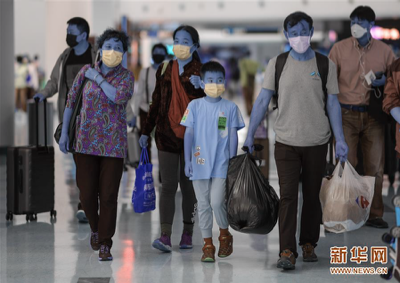

In [10]:
x[0]

In [11]:
len(y)

4072

In [12]:
import numpy as np
target_size = (224, 224)

# Create a new list to store the resized images
resized_x = []

# Iterate through the original list of images
for img_array in x:
    # Check if the item is a valid image array
    if img_array is not None:
        # Resize the image using cv2.resize()
        # cv2.resize takes the image array and the target size (width, height) as arguments
        img_resized = cv2.resize(img_array, target_size)
        # Append the resized image to the new list
        resized_x.append(img_resized)
    else:
        # Handle cases where an item in the list might be None
        print("Warning: Encountered a None value in the image list. Skipping.")

# Now, resized_x contains the images with the consistent target size
# You can convert this list to a NumPy array
X = np.array(resized_x)

# Print the shape of the new NumPy array to verify
print("Shape of resized X:", X.shape)

Shape of resized X: (4072, 224, 224, 3)


In [14]:
from sklearn.preprocessing import LabelEncoder
# Encode the string labels into numerical labels
from keras.utils import to_categorical # Import to_categorical
label_encoder = LabelEncoder()
integer_encoded_y = label_encoder.fit_transform(y)

# One-hot encode the numerical labels
Y = to_categorical(integer_encoded_y)

In [15]:
Y.shape

(4072, 3)

In [16]:
categories=np.unique(Y)

In [18]:
X.shape

(4072, 224, 224, 3)

array([[[ 91,  95,  94],
        [105, 107, 107],
        [138, 149, 149],
        ...,
        [152, 150, 147],
        [207, 207, 207],
        [229, 231, 233]],

       [[ 92,  97,  96],
        [103, 106, 106],
        [146, 156, 157],
        ...,
        [194, 188, 188],
        [205, 195, 191],
        [205, 191, 184]],

       [[ 94,  99,  98],
        [103, 108, 107],
        [152, 160, 161],
        ...,
        [175, 153, 147],
        [177, 149, 136],
        [173, 139, 121]],

       ...,

       [[  5,   6,   6],
        [  6,   6,   6],
        [ 17,  15,  15],
        ...,
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0]],

       [[  8,   8,   8],
        [  8,   7,   7],
        [ 18,  16,  16],
        ...,
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0]],

       [[  6,   6,   6],
        [ 11,  10,  10],
        [ 17,  15,  15],
        ...,
        [  0,   0,   0],
        [  1,   1,   1],
        [  0,   0,   0]]], dtype=uint8)
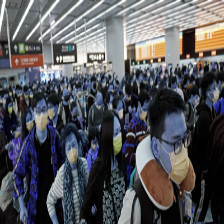

In [19]:
X[1]

In [17]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2)

In [ ]:
X_train.shape

In [ ]:
X_test.shape

In [18]:
from keras.applications.vgg16 import VGG16

In [19]:
vgg = VGG16()

553467096/553467096 ━━━━━━━━━━━━━━━━━━━━ 18s 0us/step


In [20]:
vgg.summary()

Model: "vgg16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 224, 224, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 224, 224, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 112, 112, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 112, 112, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 112, 112, 128)  │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 56, 56, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 28, 28, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 28, 28, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 14, 14, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 7, 7, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ fc1 (Dense)                     │ (None, 4096)           │   102,764,544 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ fc2 (Dense)                     │ (None, 4096)           │    16,781,312 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ predictions (Dense)             │ (None, 1000)           │     4,097,000 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 138,357,544 (527.79 MB)

 Trainable params: 138,357,544 (527.79 MB)

 Non-trainable params: 0 (0.00 B)

In [21]:
from keras import Sequential

In [22]:
model = Sequential()

In [23]:
for layer in vgg.layers[:-1]:
  model.add(layer)

In [24]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ block1_conv1 (Conv2D)           │ (None, 224, 224, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 224, 224, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 112, 112, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 112, 112, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 112, 112, 128)  │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 56, 56, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 28, 28, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 28, 28, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 14, 14, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 7, 7, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ fc1 (Dense)                     │ (None, 4096)           │   102,764,544 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ fc2 (Dense)                     │ (None, 4096)           │    16,781,312 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 134,260,544 (512.16 MB)

 Trainable params: 134,260,544 (512.16 MB)

 Non-trainable params: 0 (0.00 B)

In [25]:
for layer in model.layers:
  layer.trainable= False

In [26]:
from keras.layers import Dense # Import Dense layer
from keras.utils import to_categorical
model.add(Dense(3, activation='softmax'))

In [27]:
model.compile(optimizer = 'Adam', loss ='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
model.fit(X_train,Y_train,epochs=1, validation_data=(X_test,Y_test))

  3/102 ━━━━━━━━━━━━━━━━━━━━ 20:11 12s/step - accuracy: 0.8976 - loss: 0.3035

In [ ]:
accuracy: 0.8336 - loss: 0.5068